In [1]:
import numpy as np

In [2]:
sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0,60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [3]:
x = sampleData1[:, 0]
y = sampleData1[:, 1]

In [4]:
import matplotlib.pyplot as plt

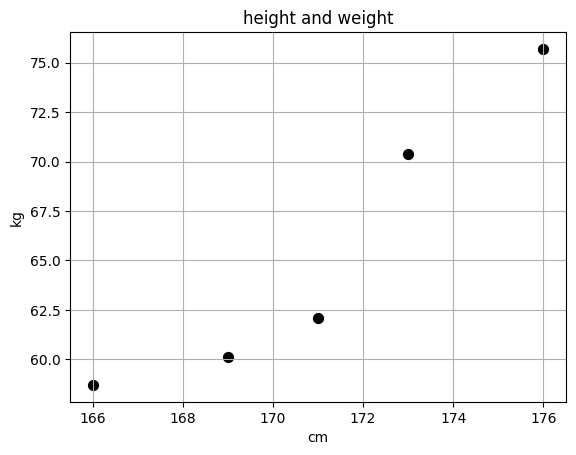

In [7]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('cm')
plt.ylabel('kg')
plt.title('height and weight')
plt.grid()
plt.show()

In [8]:
X = x - x.mean()
Y = y - y.mean()

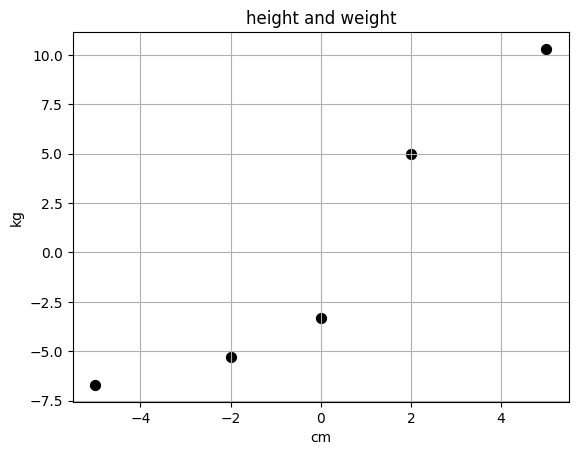

In [9]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('cm')
plt.ylabel('kg')
plt.title('height and weight')
plt.grid()
plt.show()

In [11]:
import torch

In [12]:
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [13]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

In [14]:
def pred(X):
    return W * X + B

Yp = pred(X)
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


In [15]:
def mse(Yp, Y):
    loss = ((Yp - Y)**2).mean()
    return loss

loss = mse(Yp, Y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


In [16]:
loss.backward()
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [19]:
lr = 0.001

with torch.no_grad():
    W -= lr * W.grad
    B -= lr * B.grad

    W.grad.zero_()
    B.grad.zero_()

In [20]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0381, requires_grad=True)
tensor(0.9960, requires_grad=True)
tensor(0.)
tensor(0.)


In [21]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

history = np.zeros((0, 2))

In [22]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()

    with torch.no_grad():
        W -= lr * W.grad
        B -= lr * B.grad

        W.grad.zero_()
        B.grad.zero_()

    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [23]:
print('W =', W.data.numpy())
print('B =', B.data.numpy())

print(f'초기상태 : 손실 : {history[0, 1]:.4f}')
print(f'최종상태 : 손실 : {history[-1, 1]:.4f}')

W = 1.820683
B = 0.3675114
초기상태 : 손실 : 13.3520
최종상태 : 손실 : 4.6796


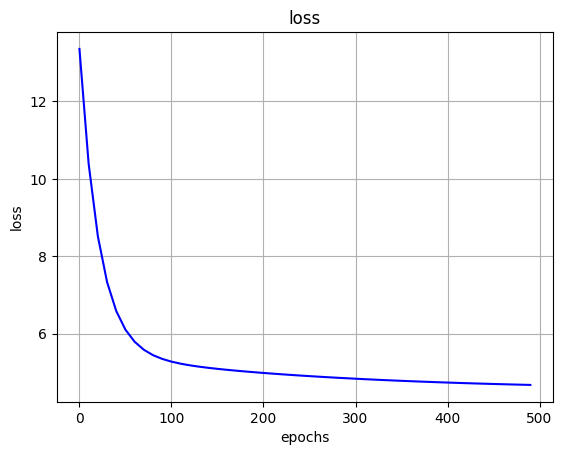

In [25]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.grid()
plt.show()

In [51]:
X_range = np.arange(-5, 5.25, 0.25)
X_range = torch.tensor(X_range).float()
Y_range = W * X_range + B

print(X_range)
print(Y_range)

tensor([-5.0000, -4.7500, -4.5000, -4.2500, -4.0000, -3.7500, -3.5000, -3.2500,
        -3.0000, -2.7500, -2.5000, -2.2500, -2.0000, -1.7500, -1.5000, -1.2500,
        -1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
         1.0000,  1.2500,  1.5000,  1.7500,  2.0000,  2.2500,  2.5000,  2.7500,
         3.0000,  3.2500,  3.5000,  3.7500,  4.0000,  4.2500,  4.5000,  4.7500,
         5.0000])
tensor([-8.7359, -8.2807, -7.8256, -7.3704, -6.9152, -6.4601, -6.0049, -5.5497,
        -5.0945, -4.6394, -4.1842, -3.7290, -3.2739, -2.8187, -2.3635, -1.9083,
        -1.4532, -0.9980, -0.5428, -0.0877,  0.3675,  0.8227,  1.2779,  1.7330,
         2.1882,  2.6434,  3.0985,  3.5537,  4.0089,  4.4640,  4.9192,  5.3744,
         5.8296,  6.2847,  6.7399,  7.1951,  7.6502,  8.1054,  8.5606,  9.0158,
         9.4709], grad_fn=<AddBackward0>)


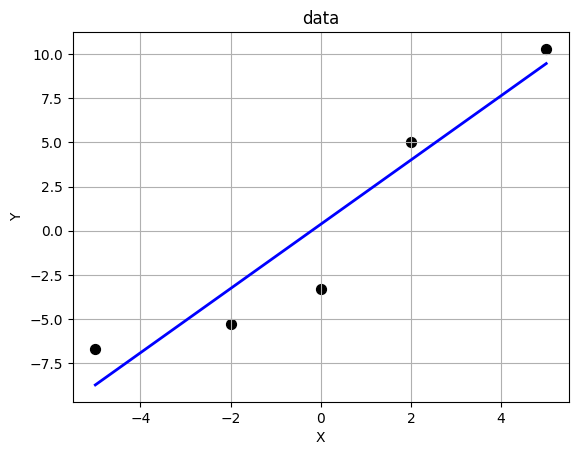

In [53]:
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('data')
plt.grid()
plt.show()

In [59]:
X_range = np.arange(-5, 5.25, 0.25)
X_range = torch.tensor(X_range).float()
Y_range = W * X_range + B

x_range = X_range + x.mean()
y_range = Y_range + y.mean()

print(x_range)
print(y_range)

tensor([166.0000, 166.2500, 166.5000, 166.7500, 167.0000, 167.2500, 167.5000,
        167.7500, 168.0000, 168.2500, 168.5000, 168.7500, 169.0000, 169.2500,
        169.5000, 169.7500, 170.0000, 170.2500, 170.5000, 170.7500, 171.0000,
        171.2500, 171.5000, 171.7500, 172.0000, 172.2500, 172.5000, 172.7500,
        173.0000, 173.2500, 173.5000, 173.7500, 174.0000, 174.2500, 174.5000,
        174.7500, 175.0000, 175.2500, 175.5000, 175.7500, 176.0000])
tensor([56.6641, 57.1193, 57.5744, 58.0296, 58.4848, 58.9400, 59.3951, 59.8503,
        60.3055, 60.7606, 61.2158, 61.6710, 62.1261, 62.5813, 63.0365, 63.4917,
        63.9468, 64.4020, 64.8572, 65.3123, 65.7675, 66.2227, 66.6779, 67.1330,
        67.5882, 68.0434, 68.4985, 68.9537, 69.4089, 69.8641, 70.3192, 70.7744,
        71.2296, 71.6847, 72.1399, 72.5951, 73.0502, 73.5054, 73.9606, 74.4158,
        74.8709], grad_fn=<AddBackward0>)


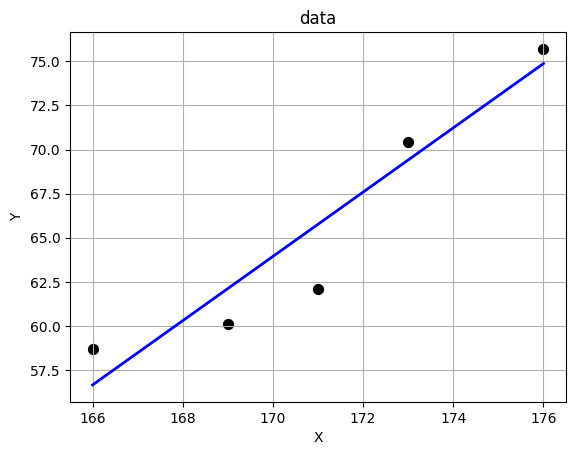

In [60]:
plt.scatter(x, y, c='k', s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_range.data, y_range.data, lw=2, c='b')
plt.title('data')
plt.grid()
plt.show()

In [61]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

history = np.zeros((0, 2))

In [62]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 10.3855
epoch = 20 loss = 8.5173
epoch = 30 loss = 7.3364
epoch = 40 loss = 6.5858
epoch = 50 loss = 6.1047
epoch = 60 loss = 5.7927
epoch = 70 loss = 5.5868
epoch = 80 loss = 5.4476
epoch = 90 loss = 5.3507
epoch = 100 loss = 5.2805
epoch = 110 loss = 5.2275
epoch = 120 loss = 5.1855
epoch = 130 loss = 5.1507
epoch = 140 loss = 5.1208
epoch = 150 loss = 5.0943
epoch = 160 loss = 5.0703
epoch = 170 loss = 5.0480
epoch = 180 loss = 5.0271
epoch = 190 loss = 5.0074
epoch = 200 loss = 4.9887
epoch = 210 loss = 4.9708
epoch = 220 loss = 4.9537
epoch = 230 loss = 4.9373
epoch = 240 loss = 4.9217
epoch = 250 loss = 4.9066
epoch = 260 loss = 4.8922
epoch = 270 loss = 4.8783
epoch = 280 loss = 4.8650
epoch = 290 loss = 4.8522
epoch = 300 loss = 4.8399
epoch = 310 loss = 4.8281
epoch = 320 loss = 4.8167
epoch = 330 loss = 4.8058
epoch = 340 loss = 4.7953
epoch = 350 loss = 4.7853
epoch = 360 loss = 4.7756
epoch = 370 loss = 4.7663
epoch = 380 loss = 4.

In [63]:
print('W =', W.data.numpy())
print('B =', B.data.numpy())

print(f'초기상태 : 손실 : {history[0, 1]:.4f}')
print(f'최종상태 : 손실 : {history[-1, 1]:.4f}')

W = 1.820683
B = 0.3675114
초기상태 : 손실 : 13.3520
최종상태 : 손실 : 4.6796


In [64]:
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

num_epochs = 500

lr = 0.001

import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

history2 = np.zeros((0, 2))

In [65]:
for epoch in range(num_epochs):
    Yp = pred(X)
    loss = mse(Yp, Y)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if (epoch % 10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))
        print(f'epoch = {epoch} loss = {loss:.4f}')

epoch = 0 loss = 13.3520
epoch = 10 loss = 5.7585
epoch = 20 loss = 5.9541
epoch = 30 loss = 5.0276
epoch = 40 loss = 4.8578
epoch = 50 loss = 4.7052
epoch = 60 loss = 4.6327
epoch = 70 loss = 4.5940
epoch = 80 loss = 4.5698
epoch = 90 loss = 4.5574
epoch = 100 loss = 4.5495
epoch = 110 loss = 4.5452
epoch = 120 loss = 4.5426
epoch = 130 loss = 4.5411
epoch = 140 loss = 4.5403
epoch = 150 loss = 4.5398
epoch = 160 loss = 4.5395
epoch = 170 loss = 4.5393
epoch = 180 loss = 4.5392
epoch = 190 loss = 4.5391
epoch = 200 loss = 4.5391
epoch = 210 loss = 4.5391
epoch = 220 loss = 4.5391
epoch = 230 loss = 4.5390
epoch = 240 loss = 4.5390
epoch = 250 loss = 4.5390
epoch = 260 loss = 4.5390
epoch = 270 loss = 4.5390
epoch = 280 loss = 4.5390
epoch = 290 loss = 4.5390
epoch = 300 loss = 4.5390
epoch = 310 loss = 4.5390
epoch = 320 loss = 4.5390
epoch = 330 loss = 4.5390
epoch = 340 loss = 4.5390
epoch = 350 loss = 4.5390
epoch = 360 loss = 4.5390
epoch = 370 loss = 4.5390
epoch = 380 loss = 4.5

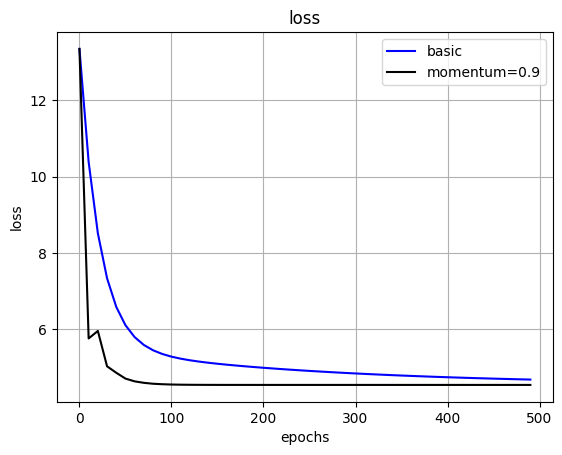

In [66]:
plt.plot(history[:, 0], history[:, 1], 'b', label='basic')
plt.plot(history2[:, 0], history2[:, 1], 'k', label='momentum=0.9')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss')
plt.legend()
plt.grid()
plt.show()